In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [9]:
data = pd.read_csv('archive GOT/character-deaths.csv')
data.rename(columns={'Death Year': 'Death_Year'}, inplace=True)

In [10]:
data_no_na = data.dropna()
data_no_na.head()

,Name,Allegiances,Death_Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
10,Aggar,House Greyjoy,299.0,2.0,56.0,50.0,1,0,0,1,0,0,0
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1


In [11]:
got_train, got_test = train_test_split(data_no_na, test_size=0.3, random_state=42, stratify=data_no_na['Death_Year'])
print(got_train.shape, got_test.shape)

(204, 13) (88, 13)


In [17]:
features= ['Book Intro Chapter', 'Death Chapter'] # add 'petal_width' ('species' does not work; categorical is not implemented in DT of sciki learn)
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(got_train[features], got_train['Death_Year'])

DecisionTreeRegressor(max_depth=3)

In [15]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

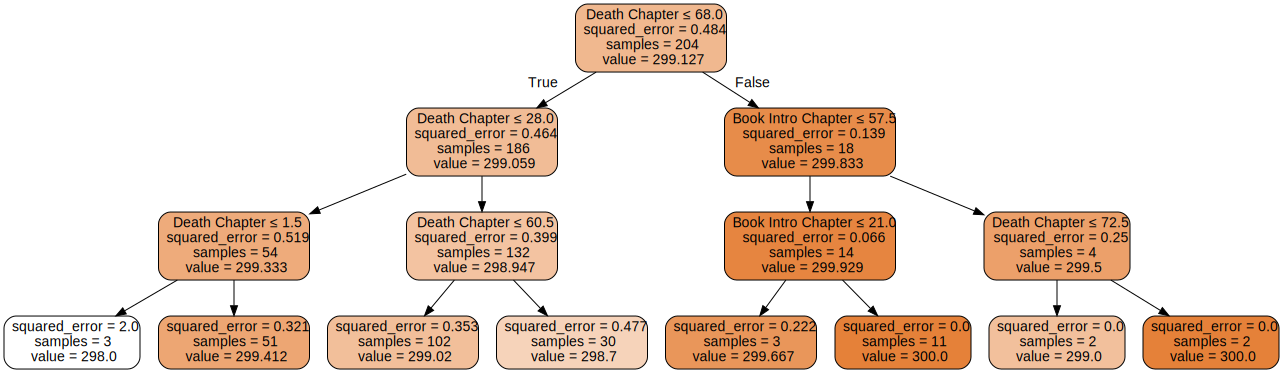

In [18]:
plot_tree_regression(dt_regression, features)

In [19]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [22]:
predictionsOnTrainset = dt_regression.predict(got_train[features])
predictionsOnTestset = dt_regression.predict(got_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, got_train.Death_Year)
rmseTest = calculate_rmse(predictionsOnTestset, got_test.Death_Year)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.599347652545726
RMSE on test set 0.7153885542938858
